In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
gt_data = pd.read_csv('/content/gas_turbines.csv')

In [3]:
gt_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gt_data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


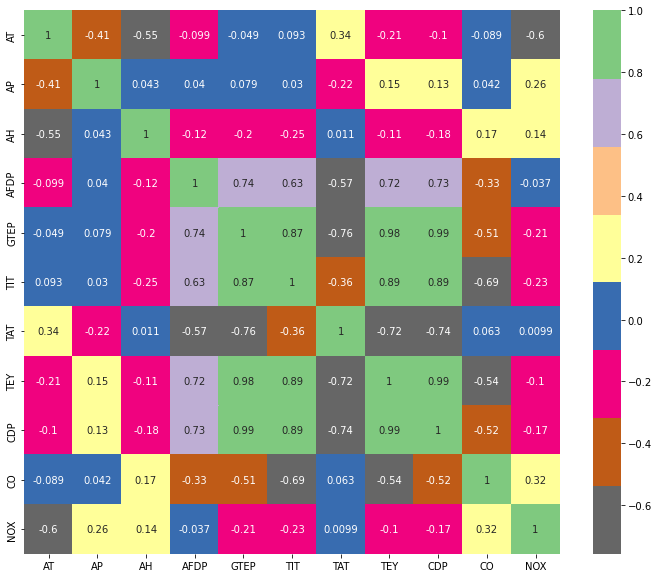

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(gt_data.corr(),annot=True,cmap=plt.cm.Accent_r)

In [6]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [8]:
corr_features=correlation(gt_data,0.65)

In [9]:
corr_features

{'CDP', 'CO', 'GTEP', 'TAT', 'TEY', 'TIT'}

In [10]:
gt_data.shape

(15039, 11)

In [11]:
gt_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [12]:
gt_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [13]:
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


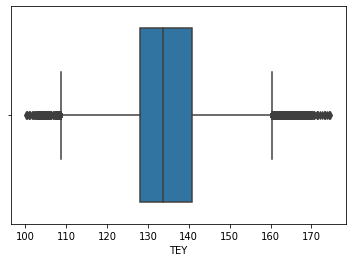

In [14]:
ax = sns.boxplot(gt_data['TEY'])

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


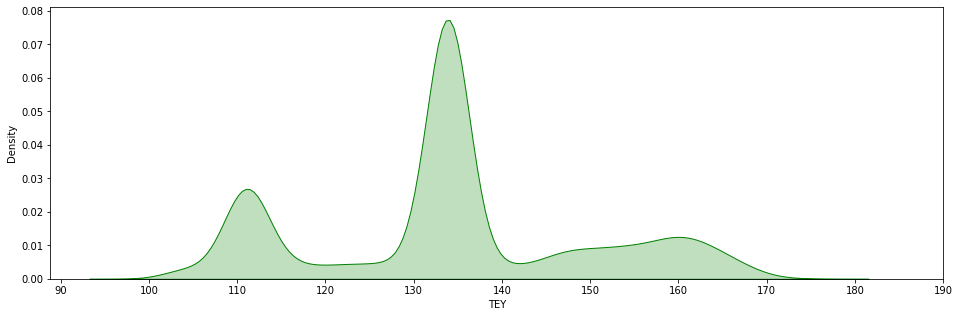

In [15]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(gt_data['TEY'].skew()))
print("Kurtosis: {}".format(gt_data['TEY'].kurtosis()))
ax = sns.kdeplot(gt_data['TEY'],shade=True,color='g')
plt.xticks([i for i in range(90,200,10)])
plt.show()

The Data has no skewness and Majority of the TEY lies between 120 and 150

In [31]:
X=gt_data.drop(['CDP', 'CO', 'GTEP', 'TAT', 'TEY', 'TIT'],axis=1)
Y=gt_data['TEY']

In [32]:
X.shape

(15039, 5)

In [33]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [34]:
X_norm = norm_func(X)

In [35]:
X_norm

,AT,AP,AH,AFDP,NOX
0,0.184182,0.456050,0.951314,0.255758,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.592087
...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.710578


In [36]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                72        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [38]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,Y, test_size=0.2)

In [39]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
1204/1204 [==============================] - 2s 2ms/step - loss: 6705.0249 - mse: 6705.0249 - mae: 63.1612
Epoch 2/100
1204/1204 [==============================] - 2s 2ms/step - loss: 242.7144 - mse: 242.7144 - mae: 12.0642
Epoch 3/100
1204/1204 [==============================] - 2s 2ms/step - loss: 217.5548 - mse: 217.5548 - mae: 11.4335
Epoch 4/100
1204/1204 [==============================] - 2s 2ms/step - loss: 190.6580 - mse: 190.6580 - mae: 10.6800
Epoch 5/100
1204/1204 [==============================] - 2s 2ms/step - loss: 169.5261 - mse: 169.5261 - mae: 9.9890
Epoch 6/100
1204/1204 [==============================] - 2s 1ms/step - loss: 155.8645 - mse: 155.8645 - mae: 9.4813
Epoch 7/100
1204/1204 [==============================] - 2s 1ms/step - loss: 148.2629 - mse: 148.2629 - mae: 9.1833
Epoch 8/100
1204/1204 [==============================] - 2s 1ms/step - loss: 142.7372 - mse: 142.7372 - mae: 8.9958
Epoch 9/100
1204/1204 [==============================] - 2s 1ms/st

In [40]:
y_pred=model.predict(x_test)

In [41]:
MSE= mean_squared_error(y_test, y_pred)
print('MSE: %f' % (MSE))

MSE: 99.364716


In [42]:
y_final=pd.DataFrame(data=y_test)

In [43]:
y_final['TEY_Predict']=y_pred

In [44]:
y_final

,TEY,TEY_Predict
10671,140.39,127.018692
14990,134.78,137.794174
10573,134.25,127.298477
5073,130.34,132.188644
4022,134.62,131.448349
...,...,...
52,151.60,147.616867
6909,132.95,116.151596
8199,133.51,132.804367
5782,133.74,134.368973
